In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import linalg as la
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normal distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [3]:
# generate dataset with 3 features (note that they all have zero mean)

N = 5000
x1 = np.random.randn(N)
x2 = x1 + 3*np.random.randn(N)
x3 = 2*x1 + x2
x = np.vstack((x1, x2, x3))

In [4]:
# covariance matrix of the dataset
cm = np.cov(x)

# eigenvalues and eigenvectors of cov matrix
eva, eve = la.eig(cm)

# eigenvectors and eigenvalues with SVD
eve_svd, eva_svd, _ = la.svd(cm)

print('covariance matrix of the dataset: \n', cm, '\n')
print('eigenvalues of dataset covariance matrix with eigendecomposition: \n', np.real_if_close(eva), '\n')
print('eigenvalues of dataset covariance matrix with SVD: \n', eva_svd, '\n')
print('eigenvectors of dataset covariance matrix with eigendecomposition: \n', eve, '\n')
print('eigenvectors of dataset covariance matrix with SVD: \n', eve_svd, '\n')

covariance matrix of the dataset: 
 [[ 0.99911734  1.062684    3.06091868]
 [ 1.062684   10.04098206 12.16635005]
 [ 3.06091868 12.16635005 18.28818742]] 

eigenvalues of dataset covariance matrix with eigendecomposition: 
 [2.73771356e+01 5.69126318e-16 1.95115125e+00] 

eigenvalues of dataset covariance matrix with SVD: 
 [2.73771356e+01 1.95115125e+00 1.06116665e-15] 

eigenvectors of dataset covariance matrix with eigendecomposition: 
 [[-0.11711378 -0.81649658  0.56534741]
 [-0.57529256 -0.40824829 -0.70878191]
 [-0.80952012  0.40824829  0.42191291]] 

eigenvectors of dataset covariance matrix with SVD: 
 [[-0.11711378  0.56534741 -0.81649658]
 [-0.57529256 -0.70878191 -0.40824829]
 [-0.80952012  0.42191291  0.40824829]] 



The two methods returns the same results, except for very small values due to machine precision.

eigenvalue: 2.738e+01 	 eigenvectors: [-0.11711378 -0.57529256 -0.80952012]
eigenvalue: 5.691e-16 	 eigenvectors: [-0.81649658 -0.40824829  0.40824829]
eigenvalue: 1.951e+00 	 eigenvectors: [ 0.56534741 -0.70878191  0.42191291]


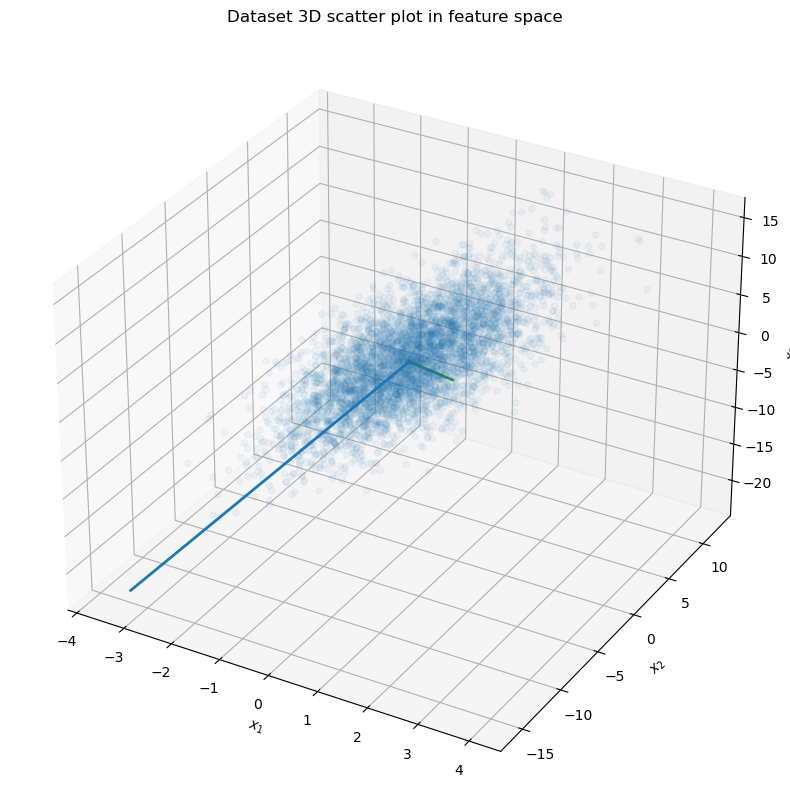

In [5]:
# What percent of the total dataset's variability is explained by the principal components? 
# Given how the dataset was constructed, do these make sense? 

fig = plt.figure()
fig.set_size_inches(10,10)
ax = fig.add_subplot(projection='3d')

ax.scatter3D(x[0,:], x[1,:], x[2,:], alpha=0.05)

for li, vi in zip(np.real_if_close(eva), eve.T):
    print(f'eigenvalue: {li:.3e} \t eigenvectors:', vi)
    ax.plot([0, li*vi[0]], [0, li*vi[1]], [0, li*vi[2]], lw=2)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

ax.set_title('Dataset 3D scatter plot in feature space')

plt.show()

eigenvalue: 2.738e+01 	 eigenvectors: [-0.11711378 -0.57529256 -0.80952012]
eigenvalue: 5.691e-16 	 eigenvectors: [-0.81649658 -0.40824829  0.40824829]
eigenvalue: 1.951e+00 	 eigenvectors: [ 0.56534741 -0.70878191  0.42191291]


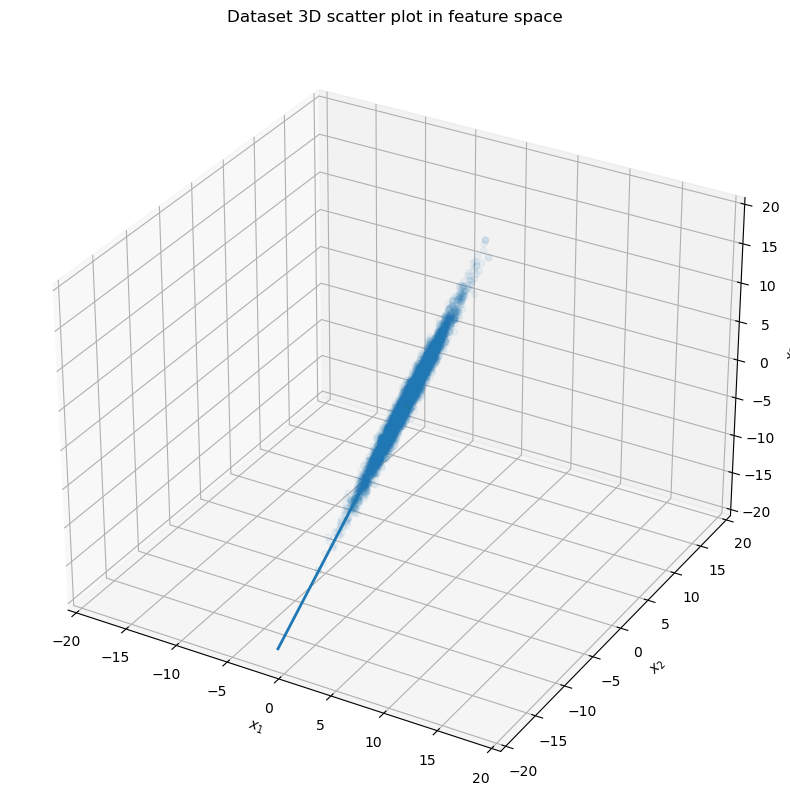

In [6]:
# better visualizing data distribution

fig = plt.figure()
fig.set_size_inches(10,10)
ax = fig.add_subplot(projection='3d')

ax.scatter3D(x[0,:], x[1,:], x[2,:], alpha=0.05)

for li, vi in zip(np.real_if_close(eva), eve.T):
    print(f'eigenvalue: {li:.3e} \t eigenvectors:', vi)
    ax.plot([0, li*vi[0]], [0, li*vi[1]], [0, li*vi[2]], lw=2)

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

ax.set_xlim3d(-20,20)
ax.set_ylim3d(-20,20)
ax.set_zlim3d(-20,20)

ax.set_title('Dataset 3D scatter plot in feature space')

plt.show()

In [93]:
# find represented dataset percentage
for li,vi in zip(np.real_if_close(eva), eve):
    print('variability represented by eigenvector', vi, f': {abs(100*li/np.sum(np.real_if_close(eva))):.1f} %')

variability represented by eigenvector [-0.11437359 -0.81649658  0.56590813] : 93.0 %
variability represented by eigenvector [-0.57871949 -0.40824829 -0.7059866 ] : 0.0 %
variability represented by eigenvector [-0.80746668  0.40824829  0.42582966] : 7.0 %


Observing the covariance matrix, the greatest variability is given by the third feature, followed by the second one, accordingly to how dataset was constructed. Consequently only one feature is mostly representative of the dataset and using the second and the third features we can represent the whole dataset without losing information.

In [94]:
# Redefine the data in the basis yielded by the PCA procedure

x_nb = np.dot(eve.T, x)

eigenvalue: 2.663e+01 	 eigenvectors: [1 0 0]
eigenvalue: -3.358e-16 	 eigenvectors: [0 1 0]
eigenvalue: 2.010e+00 	 eigenvectors: [0 0 1]


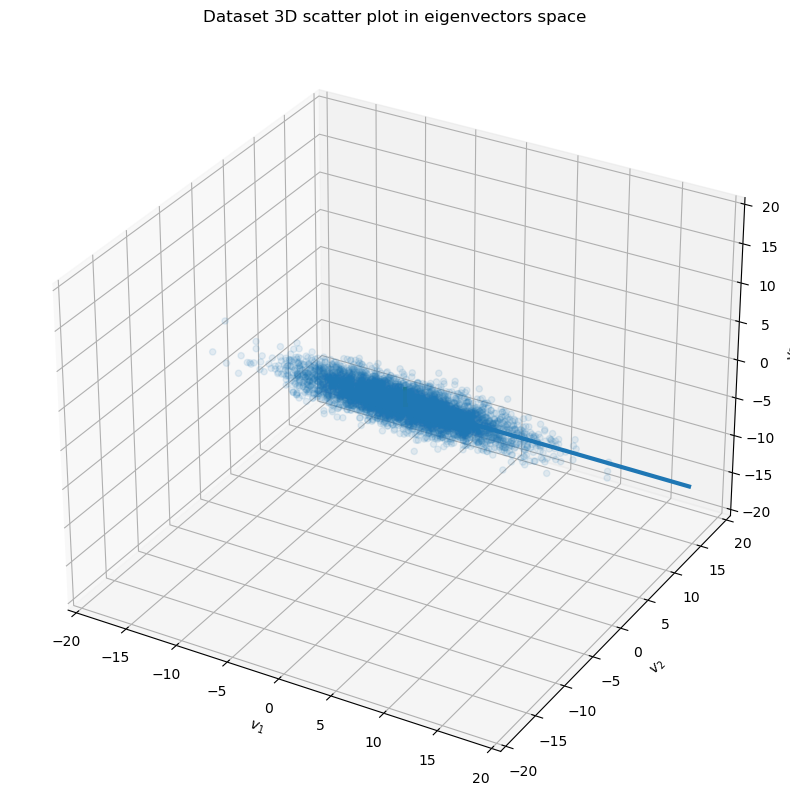

In [95]:
fig = plt.figure()
fig.set_size_inches(10,10)
ax = fig.add_subplot(projection='3d')

ax.scatter3D(x_nb[0,:], x_nb[1,:], x_nb[2,:], alpha=0.1)

for li, vi in zip(np.real_if_close(eva), np.diag([1]*3)):
    print(f'eigenvalue: {li:.3e} \t eigenvectors:', vi)
    ax.plot([0, li*vi[0]], [0, li*vi[1]], [0, li*vi[2]], lw=3)

ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
ax.set_zlabel('$v_3$')

ax.set_xlim3d(-20,20)
ax.set_ylim3d(-20,20)
ax.set_zlim3d(-20,20)

ax.set_title('Dataset 3D scatter plot in eigenvectors space')

plt.show()

In [96]:
# Reduce the dimensionality of the system so that at least 99% of the total variability is retained

x_r = np.vstack((x2,x3))

cm_r = np.cov(x_r)

eva_r, eve_r = la.eig(cm_r)

print('covariance matrix of the dataset: \n', cm_r, '\n')
print('eigenvalues of dataset covariance matrix with eigendecomposition: \n', np.real_if_close(eva_r), '\n')
print('eigenvectors of dataset covariance matrix with eigendecomposition: \n', eve_r, '\n')

covariance matrix of the dataset: 
 [[ 9.92102048 11.84077171]
 [11.84077171 17.72835599]] 

eigenvalues of dataset covariance matrix with eigendecomposition: 
 [ 1.35703021 26.29234626] 

eigenvectors of dataset covariance matrix with eigendecomposition: 
 [[-0.81027882 -0.58604457]
 [ 0.58604457 -0.81027882]] 



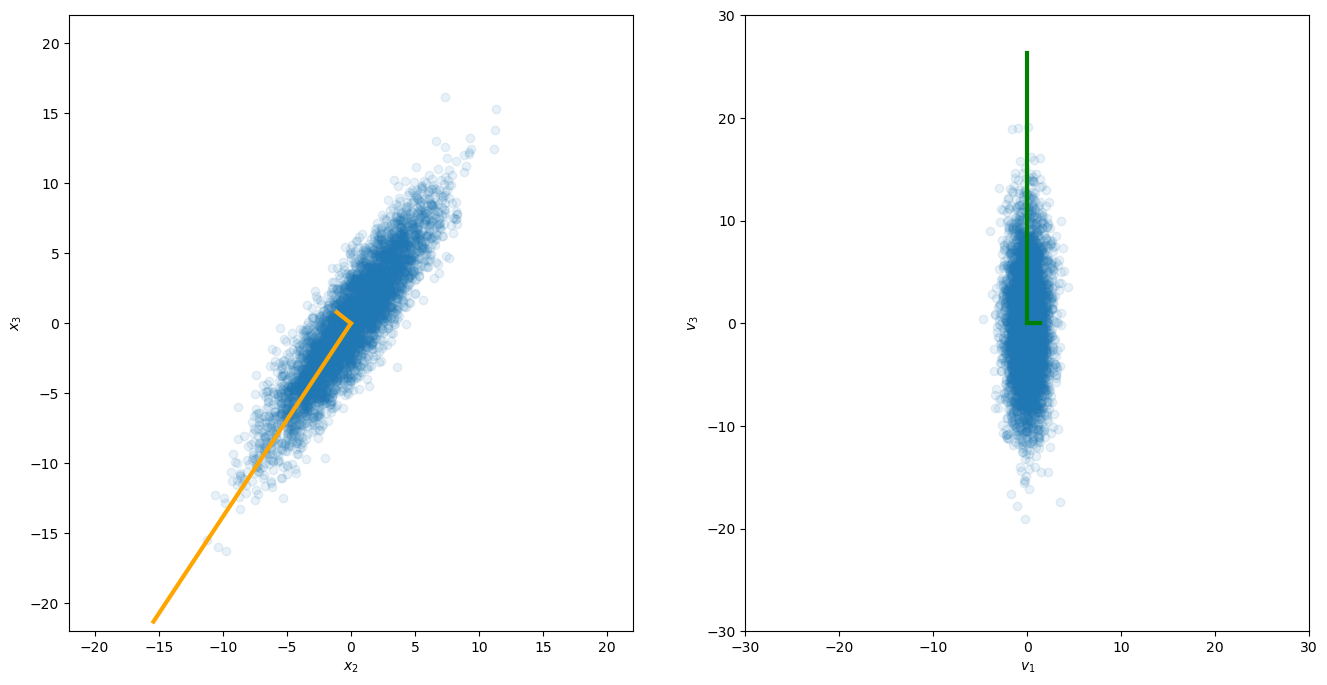

In [97]:
# reduced dataset in the new basis
x_r_nb = np.dot(eve_r.T, x_r)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

ax[0].scatter(x_r[0,:], x_r[1,:], alpha = 0.1)
ax[1].scatter(x_r_nb[0,:], x_r_nb[1,:], alpha = 0.1)

ax[0].set_xlabel('$x_2$')
ax[0].set_ylabel('$x_3$')

ax[0].set_xlim(-22,22)
ax[0].set_ylim(-22,22)

ax[1].set_xlabel('$v_1$')
ax[1].set_ylabel('$v_3$')

ax[1].set_xlim(-30,30)
ax[1].set_ylim(-30,30)

for li, vi in zip(np.real_if_close(eva_r), eve_r.T):
    ax[0].plot([0, li*vi[0]], [0, li*vi[1]], lw=3, color='orange')

for li, vi in zip(np.real_if_close(eva_r), np.diag([1]*2)):
    ax[1].plot([0, li*vi[0]], [0, li*vi[1]], lw=3, color = 'green')

plt.show()

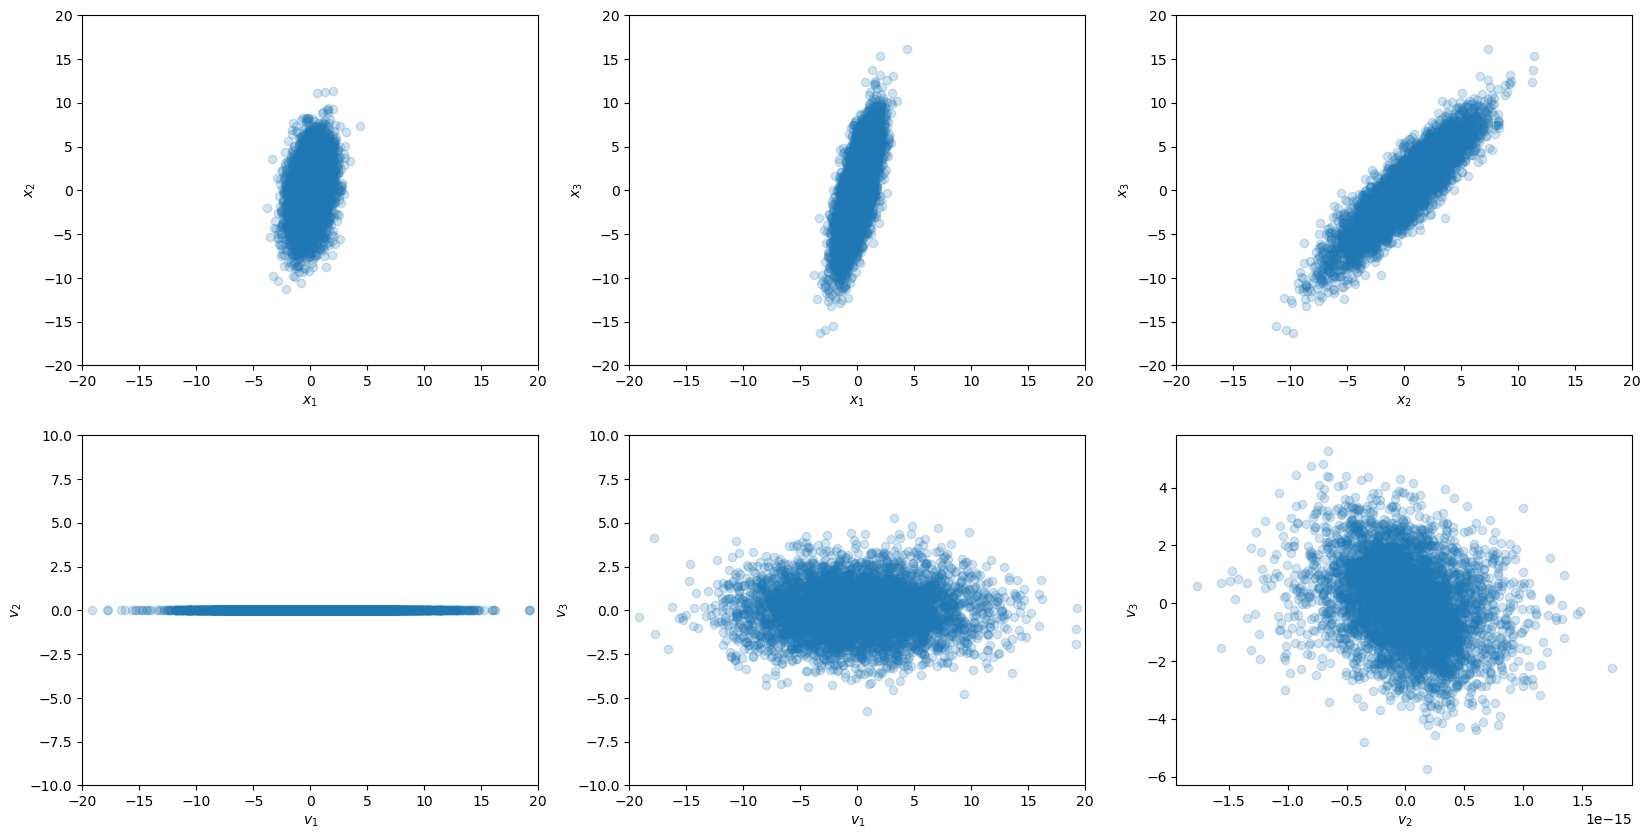

In [98]:
# Plot the data points in the original and the new coordiantes as a set of scatter plots.
# Your final figure should have 2 rows of 3 plots each, 
# where the columns show the (0,1), (0,2) and (1,2) proejctions.

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20,10))

ax[0][0].scatter(x[0,:], x[1,:], alpha=0.2)
ax[0][1].scatter(x[0,:], x[2,:], alpha=0.2)
ax[0][2].scatter(x[1,:], x[2,:], alpha=0.2)

ax[0][0].set_xlabel('$x_1$')
ax[0][0].set_ylabel('$x_2$')
ax[0][0].set_ylim(-20,20)
ax[0][0].set_xlim(-20,20)

ax[0][1].set_xlabel('$x_1$')
ax[0][1].set_ylabel('$x_3$')
ax[0][1].set_ylim(-20,20)
ax[0][1].set_xlim(-20,20)

ax[0][2].set_xlabel('$x_2$')
ax[0][2].set_ylabel('$x_3$')
ax[0][2].set_ylim(-20,20)
ax[0][2].set_xlim(-20,20)

ax[1][0].scatter(x_nb[0,:], x_nb[1,:], alpha=0.2)
ax[1][1].scatter(x_nb[0,:], x_nb[2,:], alpha=0.2)
ax[1][2].scatter(x_nb[1,:], x_nb[2,:], alpha=0.2)

ax[1][0].set_xlabel('$v_1$')
ax[1][0].set_ylabel('$v_2$')
ax[1][0].set_ylim(-10,10)
ax[1][0].set_xlim(-20,20)

ax[1][1].set_xlabel('$v_1$')
ax[1][1].set_ylabel('$v_3$')
ax[1][1].set_ylim(-10,10)
ax[1][1].set_xlim(-20,20)

ax[1][2].set_xlabel('$v_2$')
ax[1][2].set_ylabel('$v_3$')
ax[1][1].set_ylim(-10,10)
ax[1][1].set_xlim(-20,20)

plt.show()

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [116]:
# creating noise

noise_var = 10
noise_means = np.random.random(noise_var)
noise_sigma = np.random.random(noise_var)
noise = np.array([ noise_sigma[i]*np.random.randn(N)+noise_means[i] for i in range(noise_var) ])

# adding noise
x_noise = np.vstack([x, np.array(noise)])

In [124]:
# PCA

cov_noise = np.cov(x_noise)

l,V = la.eig(cov_noise)
l = np.real_if_close(l)

for li in l:
    print(f'variability represented by eigenvalue {li:.1e}', f': {abs(100*li/np.sum(np.real_if_close(eva))):.1f} %')

variability represented by eigenvalue 2.7e+01 : 93.0 %
variability represented by eigenvalue 2.0e+00 : 7.0 %
variability represented by eigenvalue 8.0e-01 : 2.8 %
variability represented by eigenvalue 7.1e-01 : 2.5 %
variability represented by eigenvalue 3.8e-01 : 1.3 %
variability represented by eigenvalue 2.4e-01 : 0.8 %
variability represented by eigenvalue 2.3e-01 : 0.8 %
variability represented by eigenvalue 1.7e-01 : 0.6 %
variability represented by eigenvalue -5.4e-16 : 0.0 %
variability represented by eigenvalue 9.6e-02 : 0.3 %
variability represented by eigenvalue 8.0e-02 : 0.3 %
variability represented by eigenvalue 3.1e-02 : 0.1 %
variability represented by eigenvalue 3.9e-02 : 0.1 %


Adding noise does not change dataset variability.

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


In [24]:
N = 3000    # records
n = 10      # cameras

time = np.linspace(0,120, N)

f = 0.5         # spring frequency
phi = np.pi/6   # spring phase
# spring motion along x axis (noise in other axis)
spring = np.array([np.sin(f*time+phi), np.random.random(N), np.random.random(N)]).T

# camera angles
thetas = np.pi * np.random.random(n)
phis = 2 * np.pi * np.random.random(n)

# rotation matrices
R_theta = np.array([[ [1,0,0], [0,np.cos(t), -np.sin(t)], [0, np.sin(t), np.cos(t)] ] for t in thetas])
R_phi = np.array([[ [np.cos(p), - np.sin(p), 0], [np.sin(p), np.cos(p), 0], [0,0,1] ] for p in phis])
R = np.matmul(R_phi, R_theta)

# emulating camers records
records = pd.DataFrame()
for cam in range(n):
    r = np.dot(spring, R[cam])
    records['x'+str(cam)] = r[:,0]
    records['y'+str(cam)] = r[:,1]
    records['z'+str(cam)] = r[:,2]

records.head()

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,z6,x7,y7,z7,x8,y8,z8,x9,y9,z9
0,-0.010603,-0.435234,0.541615,0.190685,0.631125,-0.219561,0.600594,0.189036,-0.294005,-0.446826,...,-0.506737,-0.124391,-0.024801,-0.683227,0.105174,0.664507,0.173943,-0.547242,0.426647,-0.037225
1,-0.048720,-0.521199,0.323765,0.225143,0.444251,-0.361659,0.586942,0.176187,-0.057467,-0.416248,...,-0.376605,-0.085736,-0.227200,-0.565575,0.141801,0.596814,-0.050507,-0.524603,0.253735,-0.198131
2,-0.091297,-0.462252,0.435490,0.262821,0.523673,-0.261447,0.568980,0.241232,-0.172430,-0.380049,...,-0.478104,-0.041951,-0.118532,-0.629169,0.182287,0.610487,0.075762,-0.496830,0.376053,-0.152996
3,0.243447,-0.467851,1.102238,0.021673,1.215678,-0.121394,0.894005,0.093974,-0.827650,-0.803121,...,-0.794272,-0.427287,0.311596,-1.101550,-0.107133,1.062384,0.594089,-0.883522,0.767809,0.350625
4,-0.197720,-0.441411,0.390312,0.353652,0.454531,-0.233692,0.512917,0.329965,-0.119663,-0.281156,...,-0.503457,0.069987,-0.140772,-0.601303,0.281730,0.551161,0.055942,-0.417184,0.394890,-0.237274


In [25]:
l, V = la.eig(records.cov())
l = np.real_if_close(l)
print('eigenvalues: \n', l)

eigenvalues: 
 [ 4.99027061e+00  8.23266709e-01  8.48493307e-01  5.05503014e-16
  3.18361285e-16 -3.11017250e-16 -2.85880315e-16  2.57340315e-16
  2.26513297e-16  1.56263722e-16 -1.70869641e-16 -1.43675733e-16
 -1.43675733e-16  1.29473597e-16  1.16915026e-16 -1.23160607e-16
  8.55694310e-17  5.71946970e-17 -7.57787829e-17 -6.01064310e-17
 -6.01064310e-17 -4.07793573e-17 -4.07793573e-17  3.44378242e-17
  1.91461716e-17 -1.10705935e-17 -1.10705935e-17  2.74157257e-18
  2.74157257e-18 -1.65504257e-19]


In [26]:
c = 2
print(f'The first {c+1} components account for {np.sum(l[0:c])*100/np.sum(l):.2f}% of the dataset variability.')

The first 3 components account for 87.26% of the dataset variability.


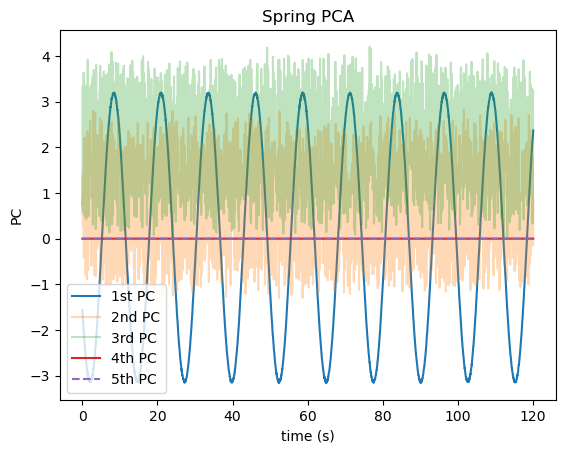

In [27]:
# change basis
records_nb = np.real_if_close(np.matmul(records, V))

# plot first principal component
fig, ax = plt.subplots()

ax.plot(time, records_nb[:,0], label = '1st PC')
ax.plot(time, records_nb[:,1], label = '2nd PC', alpha = 0.3)
ax.plot(time, records_nb[:,2], label = '3rd PC', alpha = 0.3)
ax.plot(time, records_nb[:,3], label = '4th PC')
ax.plot(time, records_nb[:,4], label = '5th PC', linestyle = 'dashed')
ax.legend()
ax.set_title('Spring PCA')
ax.set_xlabel('time (s)')
ax.set_ylabel('PC')
plt.show()

4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset.

In [51]:
data = pd.read_csv('magic04.data')
data.columns = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
data 

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [52]:
# converting event class: g=1, h=0
data['class'] = np.where(data['class']=='g',1,0)
data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,1
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


<Axes: >

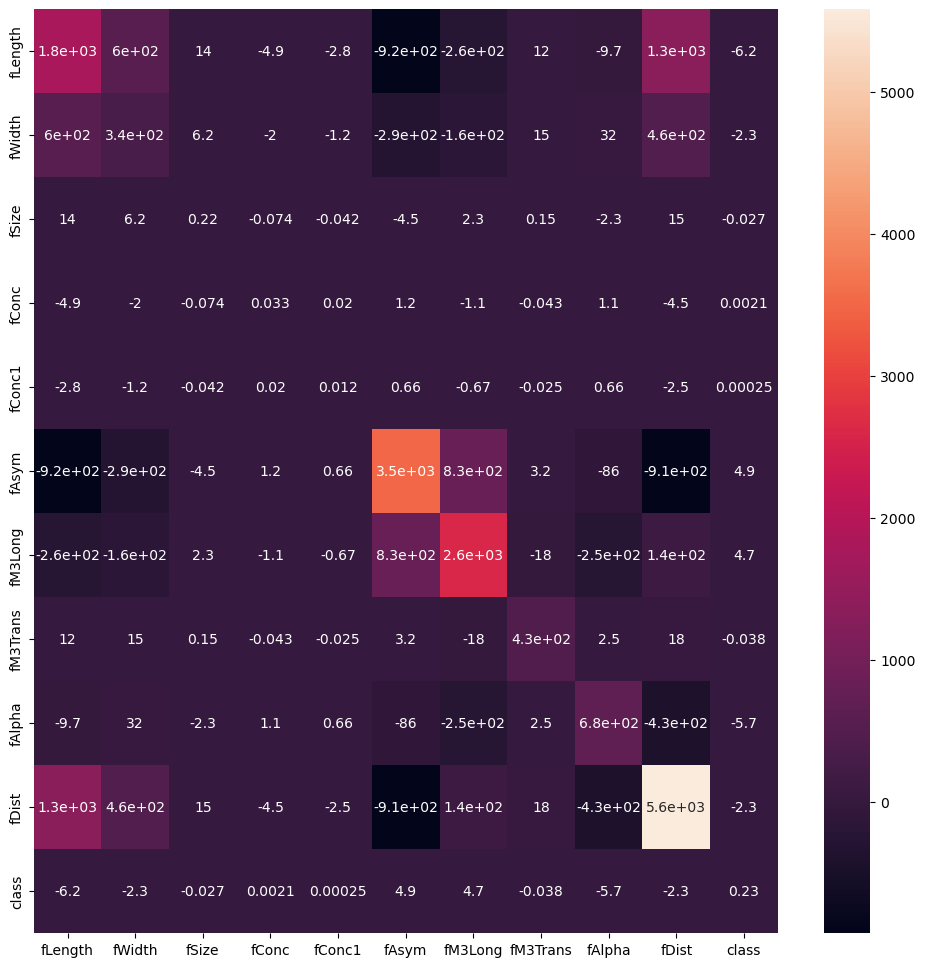

In [62]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data.cov(), annot=True)

In [66]:
l, V = la.eig(data.cov())
l = np.real_if_close(l)
l

array([6.57941290e+03, 3.85407324e+03, 2.01648252e+03, 1.32683292e+03,
       6.10257200e+02, 4.33618585e+02, 1.17336581e+02, 1.55847151e-01,
       8.63198695e-02, 1.05947330e-02, 3.84512483e-04])

In [68]:
np.sum(l[0:4])*100/np.sum(l)

92.22489794642283